# k-means clustering algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## Generate sample normally distributed clusters
* Anisotropic scale cluster to ellipse shape; 
* Rotate cluster;
* offset clusters.

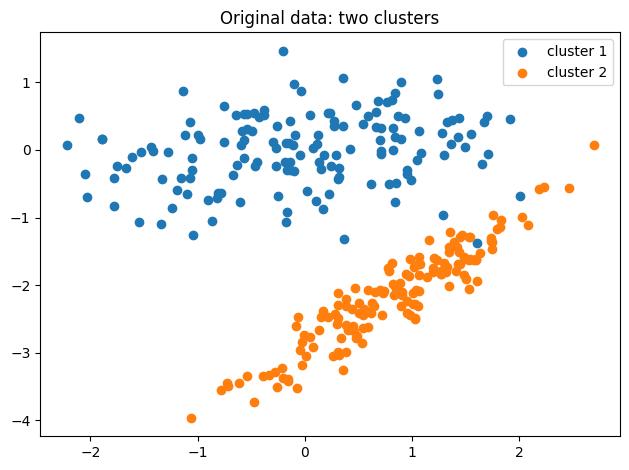

In [7]:
n1 = 100
n2 = 50
np.random.seed(69)

scale_1 = np.array([[0.9,0],[0,0.5]])
cluster_1 = scale_1 @ np.random.randn(2,n1+n2)   # [x,y] : (2,N)
scale_2 = np.array([[1,0],[0,0.2]]) 
cluster_2 = scale_2 @ np.random.randn(2,n1+n2)

theta = np.pi/4
R = np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta),np.cos(theta)]])
offset = np.array([[1,-2]]).T
cluster_2 = R @ cluster_2 + offset

fig, ax = plt.subplots(1,tight_layout=True)
ax.scatter(*cluster_1, label= 'cluster 1')
ax.scatter(*cluster_2, label= 'cluster 2')
ax.set_title('Original data: two clusters')
plt.legend();

## Split data into traning and validation

In [3]:
train_1 = cluster_1.T[:n1]
train_2 = cluster_2.T[:n1]
train_all = np.vstack((train_1,train_2))
print(train_all.shape)

validate_1 = cluster_1.T[n1:]
validate_2 = cluster_2.T[n1:]

(200, 2)


## Manual k-means method implementation
k-means clustering follows the following flow-diagram:
1. Define an initial guess for cluster centroid;
2. iterate though all the elements in dataset and calculate distances to cluster centroids;
3. associate element with cluster with closest centroid;
4. recalculate cluster centroids;
5. repeat 2.

In practice we can replace iterations with vectorization:

2. calculate all element distances to both centroids
3. compare if distance to cluster 1 is smaller to dist to cluster 2

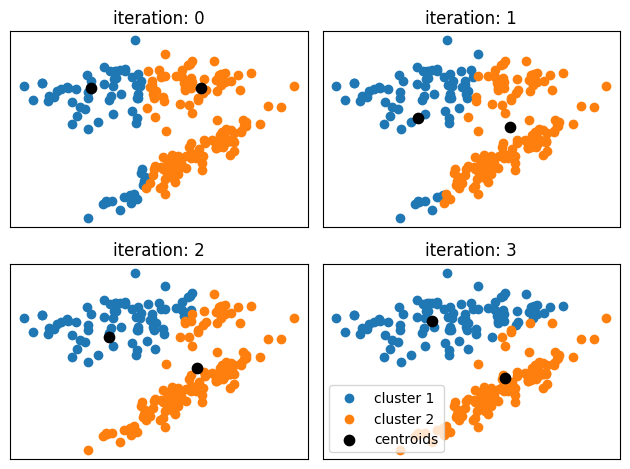

In [4]:
fig, ax = plt.subplots(2,2,tight_layout=True, sharex=True, sharey=True)
ax = ax.flatten()
guess_all = guess_1, guess_2 = np.array([[-1,0 - 0.0001], [1,0 + 0.0001]]) 

for i in range(4):
    dists_all_1 = np.linalg.norm(train_all - guess_1, axis = 1)
    dists_all_2 = np.linalg.norm(train_all - guess_2, axis = 1)
    closer_bool = dists_all_1 < dists_all_2 # mask: dist to cluster 1 smaller than to c2

    class_1 = train_all[closer_bool]
    class_2 = train_all[~closer_bool]

    ax[i].scatter(*class_1.T, label= 'cluster 1')
    ax[i].scatter(*class_2.T, label= 'cluster 2') 
    ax[i].scatter(*guess_all.T, label= 'centroids', c= 'k', s=55) 
    guess_all = guess_1, guess_2 = np.array([np.mean(class_1, axis=0), np.mean(class_2, axis=0)])
    ax[i].set_title(f'iteration: {i}')
    ax[i].set_xticks([])
    ax[i].set_yticks([])   
    
plt.legend()


## Repeat same procedure using sklearn library

In [5]:
common_params = {
    "n_init": "auto",
    "random_state": 0,
}
y_pred = KMeans(n_clusters=2, **common_params).fit(train_all)
centroids = y_pred.cluster_centers_
sel = y_pred.labels_.astype(bool)

## Calculate a dividing line
* its a line perpendicular to line connecting cluster centroids
* going though two centroid midpoint (weighted in my case)

slope = dy/dx; slope_perp = -1/slope

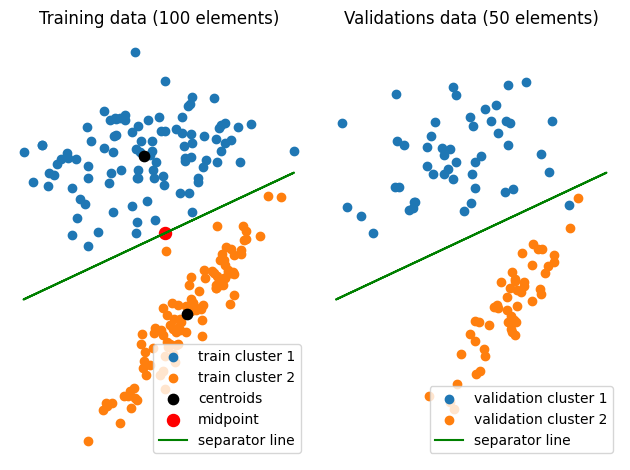

In [6]:
fig, ax = plt.subplots(1,2,tight_layout=True, sharex=True, sharey=True)
c1,c2 = centroids
c1_weight = sel.sum()/len(sel)
c2_weight = 1 - c1_weight
mid_point = mx,my = c1_weight*c1 + c2_weight*c2
disp = dx,dy = c1-c2
slope = -(dx/dy)
xses = train_all[:,0]
yses = slope*(xses -mx) + my

ax[0].scatter(*train_all[sel].T, label='train cluster 1')
ax[0].scatter(*train_all[~sel].T, label='train cluster 2')
ax[0].scatter(*centroids.T, label= 'centroids', c= 'k', s=55)
ax[0].scatter(*mid_point.T, label= 'midpoint', c= 'r', s=75)
ax[0].plot(xses,yses, c='green', label='separator line')
ax[0].legend()
ax[0].set_title(f'Training data ({n1} elements)')
ax[0].axis('off')


validate_1

ax[1].scatter(*validate_1.T, label='validation cluster 1')
ax[1].scatter(*validate_2.T, label='validation cluster 2')
ax[1].plot(xses,yses, c='green', label='separator line')
ax[1].legend()
ax[1].set_title(f'Validations data ({n2} elements)')
ax[1].axis('off');